### Index

1. Exploring Data
2. Data Cleaning
3. EDA
4. Data Modeling and Model Evaluation
5. Feature Selection
6. Prediction on Test Data 
 

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

# For Hopkins test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

#Importing Miscellaneous Libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

# Other sklearn packages
import sklearn.metrics as metrics
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

## Libraries for KMeans clustering ##
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Importing confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing required packages for visualization
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.svm import SVC


In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

### 1. Exploring Data

In [3]:
#Importing Train Data
trndt = pd.read_csv("train.csv")
trndt.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
#Checking the shape of the train data
trndt.shape

(69999, 172)

In [5]:
trndt.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

### 2. Data Cleaning

In [191]:
telecom_df = trndt.copy()

In [7]:
# Cheking the percentage of missing values in columns
telecom_df_missing_columns = (round(((telecom_df.isnull().sum()/len(telecom_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
telecom_df_missing_columns

,null
arpu_3g_6,74.90
count_rech_2g_6,74.90
night_pck_user_6,74.90
arpu_2g_6,74.90
date_of_last_rech_data_6,74.90
total_rech_data_6,74.90
av_rech_amt_data_6,74.90
max_rech_data_6,74.90
count_rech_3g_6,74.90
fb_user_6,74.90


In [8]:
# Listing the columns having more than 30% missing values
col_list_missing_30 = list(telecom_df_missing_columns.index[telecom_df_missing_columns['null'] > 30])

In [9]:
# Deleting the columns having more than 30% missing values
telecom_df = telecom_df.drop(col_list_missing_30, axis=1)

In [10]:
telecom_df.shape

(69999, 142)

In [11]:
# Converting date columns to standard date time format
date_column= [column for column in telecom_df.columns if 'date' in column]

for i in telecom_df[date_column]:
    telecom_df[i] = pd.to_datetime(telecom_df[i])

In [12]:
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,2014-06-12,2014-07-10,2014-08-26,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,2014-06-11,201

In [14]:
# Dropping columns with unique values.
columns = []
for i in telecom_df.columns:
    if telecom_df[i].nunique() ==1:
        columns.append(i)
telecom_df = telecom_df.drop(columns,1)
telecom_df.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,2014-06-22,2014-07-10,2014-08-24,65,65,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,2014-06-12,2014-07-10,2014-08-26,0,0,0,0.0,352.91,0.00,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,2014-06-11,2014-07-22,2014-08-24,70,50,0,0.0,0.00,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.6,0.56,0.0,0.0,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,8

In [15]:
telecom_df.shape

(69999, 129)

In [16]:
# While all other columns have utilised the integers "6,7,8" to indicate month name, certain columns representing volume-based users have month specified in their names.
alphabetic_month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']
telecom_df = telecom_df.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6'})

*_Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum._*

In [17]:
telecom_df['avg_rech_amt_6_7'] = (telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7'])/2

In [18]:
percentage = telecom_df['avg_rech_amt_6_7'].quantile(0.7)
percentage

370.0

In [19]:
# Segregating high value customers
high_val_customers = telecom_df.loc[telecom_df['avg_rech_amt_6_7'] >= percentage]
high_val_customers.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,3g_vbc_8,3g_vbc_7,3g_vbc_6,churn_probability,avg_rech_amt_6_7
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,2014-06-29,2014-07-30,2014-08-30,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,2014-06-27,2014-07-25,2014-08-30,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,2014-06-30,2014-07-31,2014-08-22,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.36,252.48,257.74

In [20]:
# Let us create a seperate category for categorical columns
categorical_columns = []

for i in telecom_df.columns:
    if telecom_df[i].nunique()==2:
        categorical_columns.append(i)
categorical_columns

['churn_probability']

In [21]:
#Removing this Column so that it doesn't create dummies.
categorical_columns.remove('churn_probability')

In [22]:
high_val_customers.shape

(21018, 130)

In [23]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = high_val_customers[(high_val_customers.isnull().sum(axis=1)) > (len(high_val_customers.columns)//2)]
df_missing_rows_50.shape

(80, 130)

In [24]:
# Deleting the rows having more than 50% missing values
high_val_customers = high_val_customers.drop(df_missing_rows_50.index)
high_val_customers.shape

(20938, 130)

In [25]:
# Checking the missing values in columns again
high_val_customers_missing_columns = (round(((high_val_customers.isnull().sum()/len(high_val_customers.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
high_val_customers_missing_columns

,null
std_ic_t2t_mou_8,2.75
roam_og_mou_8,2.75
loc_og_t2c_mou_8,2.75
std_ic_mou_8,2.75
isd_og_mou_8,2.75
loc_og_t2f_mou_8,2.75
loc_ic_t2f_mou_8,2.75
spl_og_mou_8,2.75
loc_og_t2m_mou_8,2.75
std_og_mou_8,2.75


In [26]:
# Deriving a new column churn based on the 8th month 


high_val_customers['churn'] = high_val_customers.apply(lambda x: 1 if (x.total_ic_mou_8 == 0 and x.total_og_mou_8 == 0 and x.vol_2g_mb_8 ==0 and x.vol_3g_mb_8==0) else 0, axis=1)
high_val_customers['churn'] = high_val_customers['churn'].astype("str")
high_val_customers.shape

(20938, 131)

In [27]:
high_val_customers['churn'].value_counts()

0    19757
1     1181
Name: churn, dtype: int64

In [28]:
high_val_customers['churn_probability'].value_counts()

0    19118
1     1820
Name: churn_probability, dtype: int64

_Able to observer that the churn and churn probablity are almost similar_

In [29]:
print("The Percentage of churned customers is:" , round(100*(high_val_customers.churn.astype("int").sum()/len(high_val_customers)),2))

The Percentage of churned customers is: 5.64


In [30]:
#Convert AON to Years
high_val_customers['aon_yr'] = round((high_val_customers['aon']/365),1)

In [31]:
high_val_customers.drop('aon', axis=1, inplace=True)
high_val_customers.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,3g_vbc_8,3g_vbc_7,3g_vbc_6,churn_probability,avg_rech_amt_6_7,churn,aon_yr
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,2014-06-29,2014-07-30,2014-08-30,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,469.5,0,0.9
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,2014-06-27,2014-07-25,2014-08-30,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,527.0,0,1.6
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,2014-06-30,2014-07-31,2014-08-22,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,1205.0,0,1.2
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.3

In [32]:
age_range = [ 0,  2,  4,  6,  8, 10, 12]
age_bin = [ 1, 2, 3, 4, 5, 6]
high_val_customers['age_group'] = pd.cut(high_val_customers['aon_yr'], age_range, labels=age_bin)
high_val_customers['age_group'] = high_val_customers['age_group'].astype(str)
high_val_customers['age_group'].head()

12    1
15    1
23    1
24    2
25    4
Name: age_group, dtype: object

In [33]:
# let us append our age group column to categorical column list

categorical_columns.append('age_group')
categorical_columns

['age_group']

#### Null Value Treatment


In [34]:
# Now Checking Null values
null = round(100*(high_val_customers.isnull().sum()/len(high_val_customers.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

loc_ic_mou_8           2.75
loc_og_mou_8           2.75
loc_og_t2c_mou_8       2.75
loc_ic_t2m_mou_8       2.75
loc_og_t2f_mou_8       2.75
loc_ic_t2f_mou_8       2.75
std_og_t2t_mou_8       2.75
loc_og_t2m_mou_8       2.75
std_og_mou_8           2.75
std_ic_t2t_mou_8       2.75
loc_og_t2t_mou_8       2.75
og_others_8            2.75
std_ic_t2m_mou_8       2.75
roam_og_mou_8          2.75
std_ic_t2f_mou_8       2.75
roam_ic_mou_8          2.75
std_og_t2m_mou_8       2.75
std_ic_mou_8           2.75
offnet_mou_8           2.75
spl_og_mou_8           2.75
spl_ic_mou_8           2.75
onnet_mou_8            2.75
isd_og_mou_8           2.75
isd_ic_mou_8           2.75
std_og_t2f_mou_8       2.75
ic_others_8            2.75
loc_ic_t2t_mou_8       2.75
date_of_last_rech_8    1.92
og_others_6            0.68
loc_ic_t2t_mou_6       0.68
std_ic_t2t_mou_6       0.68
loc_ic_t2m_mou_6       0.68
loc_ic_t2f_mou_6       0.68
loc_ic_mou_6           0.68
std_ic_t2m_mou_6       0.68
std_ic_t2f_mou_6    

In [35]:
high_val_customers =  high_val_customers.apply(lambda x: x.fillna(0))

In [36]:
# Now Checking Null values
null = round(100*(high_val_customers.isnull().sum()/len(high_val_customers.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

Series([], dtype: float64)

In [38]:
# Since the date columns don't imply anything, let's remove them.
del_date = [i for i in high_val_customers.columns if 'date' in i]
high_val_customers= high_val_customers.drop(del_date,1)

In [39]:
high_val_customers.shape

(20938, 129)

In [44]:
high_val_customers.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,3g_vbc_8,3g_vbc_7,3g_vbc_6,churn_probability,avg_rech_amt_6_7,churn,aon_yr,age_group
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,469.5,0,0.9,1
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,527.0,0,1.6,1
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,1205.0,0,1.2,1
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.36,252.48,257.74,129.73,0.00,0.00,0.00,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.

In [47]:
# List the columns of total mou, rech_num and rech_amt
[total for total in high_val_customers.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

### Derived Columns

_Deriving new columns based on the active phase and churn phase_

In [48]:
high_val_customers['total_mou_good'] = (high_val_customers['total_og_mou_6'] + high_val_customers['total_ic_mou_6'] + high_val_customers['total_og_mou_7']+ high_val_customers['total_ic_mou_7'])/2
high_val_customers['avg_mou_action'] = (  high_val_customers['total_og_mou_8'] +   high_val_customers['total_ic_mou_8'])

In [49]:
high_val_customers['diff_mou'] = high_val_customers['avg_mou_action'] - high_val_customers['total_mou_good']

In [50]:
high_val_customers['decrease_mou_action'] = np.where((high_val_customers['diff_mou'] < 0), 1, 0)

In [51]:
high_val_customers.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,3g_vbc_8,3g_vbc_7,3g_vbc_6,churn_probability,avg_rech_amt_6_7,churn,aon_yr,age_group,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,469.5,0,0.9,1,861.250,714.40,-146.850,1
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,527.0,0,1.6,1,852.500,1021.47,168.970,0
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,1205.0,0,1.2,1,1511.360,591.10,-920.260,1
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.36,252


Deriving new column decrease_rech_num_action

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.


In [52]:
high_val_customers['diff_arpu'] = high_val_customers['arpu_7'] - high_val_customers['arpu_6']

In [53]:
high_val_customers['decrease_arpu_action'] = np.where(high_val_customers['diff_arpu'] < 0, 1, 0)

In [54]:
high_val_customers.shape

(20938, 135)

## 3. EDA

### Univariate Analysis

In [55]:
df =pd.DataFrame(high_val_customers.drop('id',1).skew().sort_values(ascending = False))
df.columns = ['Skewness']
df
# Able to observe that there are many columns that are highly skewed

,Skewness
og_others_7,112.857805
og_others_8,106.592929
isd_og_mou_8,80.581795
isd_og_mou_6,79.464156
isd_og_mou_7,78.276838
ic_others_6,56.127897
spl_ic_mou_7,51.069222
ic_others_7,48.669927
ic_others_8,47.614593
spl_ic_mou_6,43.741299


In [57]:
rech_call_data =  high_val_customers.columns[high_val_customers.columns.str.contains('rech_amt|rech_data')]
rech_call_data

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'avg_rech_amt_6_7'],
      dtype='object')

In [56]:
def plotDistribution(num):
    i=1
    plt.figure(figsize=(20, 50))
    for var in num:
        plt.subplot(15,3,i)
        ax = sns.distplot(high_val_customers[[var]], hist=True, rug=True)
        plt.title(var)
        i=i+1
    plt.tight_layout()
    plt.show()

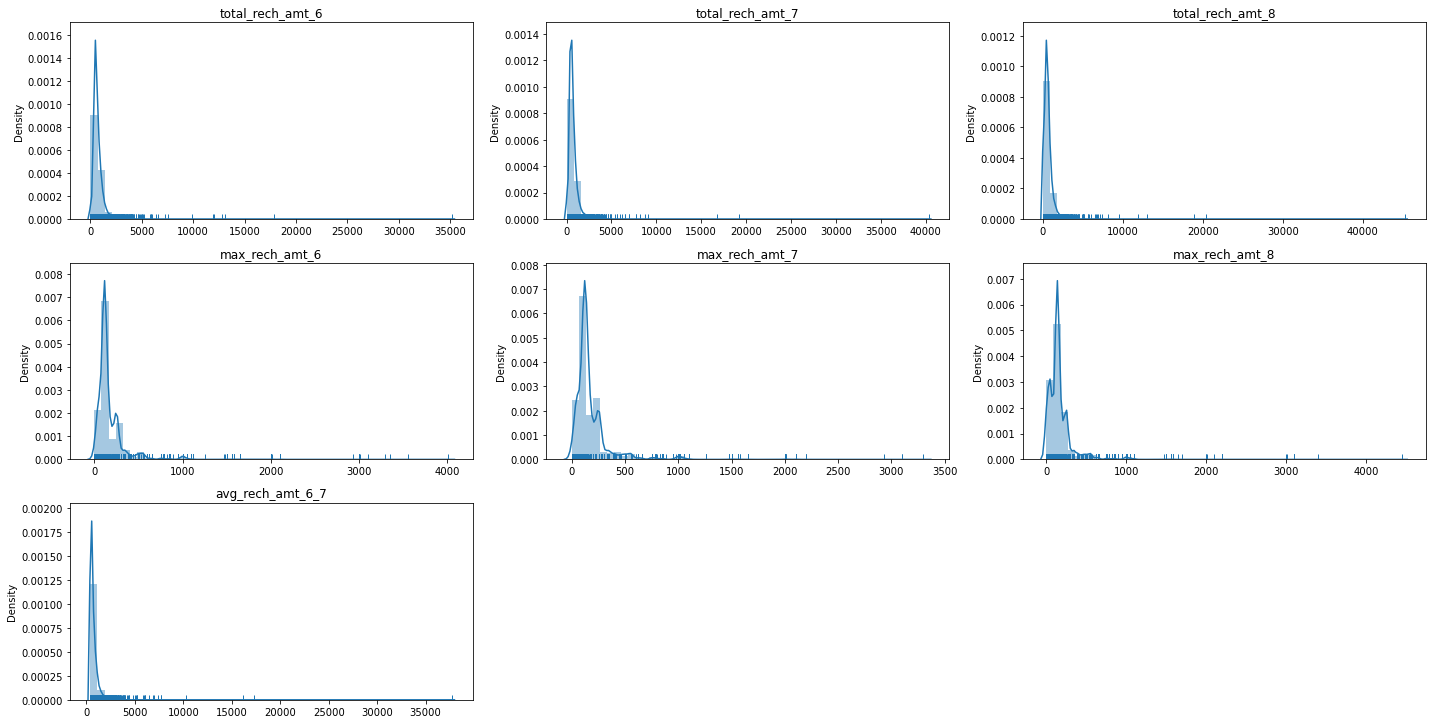

In [58]:
plotDistribution(rech_call_data)

Columns show all call kinds for good and action phase both inside the same operator network and outside the network.

In [59]:
onnet_offnet_data =  high_val_customers.columns[high_val_customers.columns.str.contains('onnet|offnet')]
onnet_offnet_data

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8'],
      dtype='object')

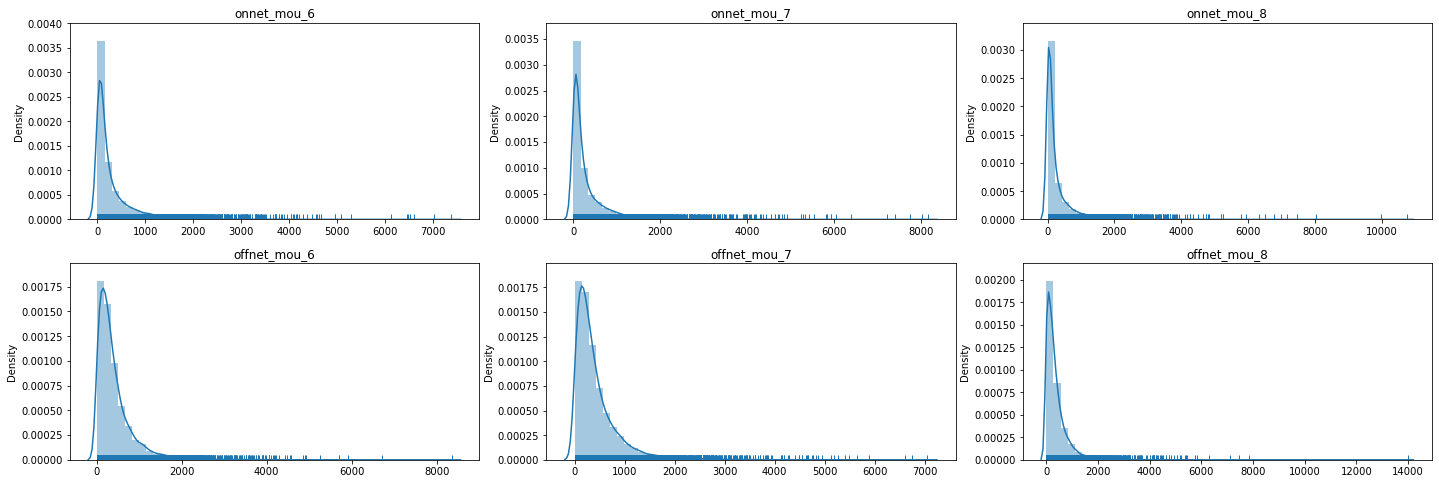

In [60]:
plotDistribution(onnet_offnet_data)

`columns for overall and roaming outgoing calls for the positive and action phases`

In [61]:
og_data =  high_val_customers.columns[high_val_customers.columns.str.contains('total_og|roam_og')]
og_data

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8'],
      dtype='object')

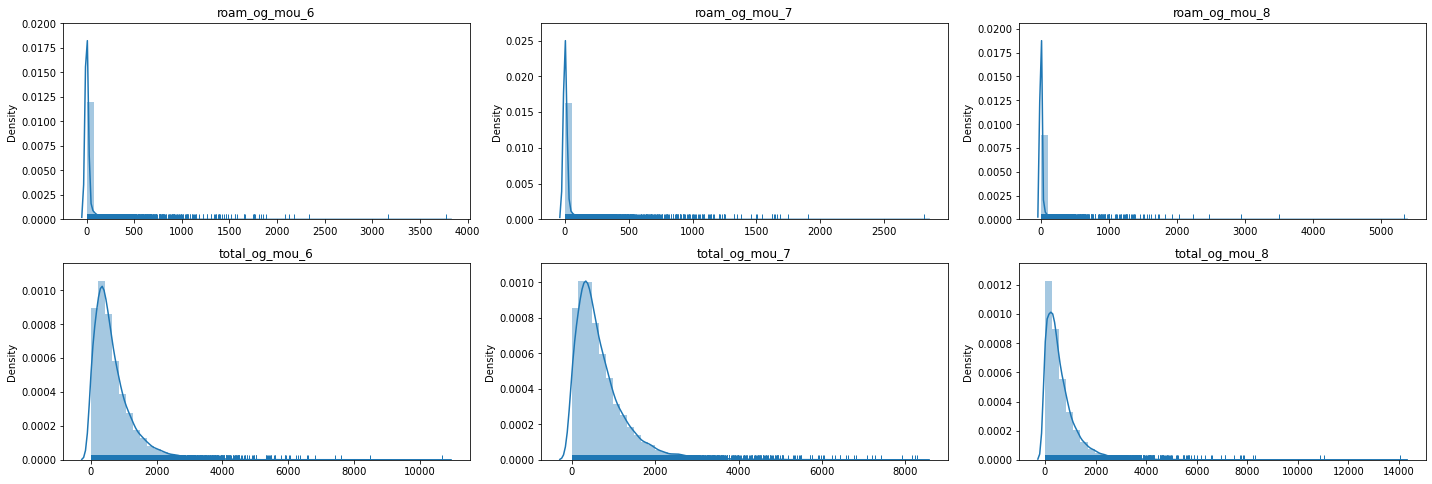

In [62]:
plotDistribution(og_data)

Columns representing the good and action phases' total incoming calls and roaming outgoing calls

In [63]:
ic_data =  high_val_customers.columns[high_val_customers.columns.str.contains('total_ic|roam_ic')]
ic_data

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8'],
      dtype='object')

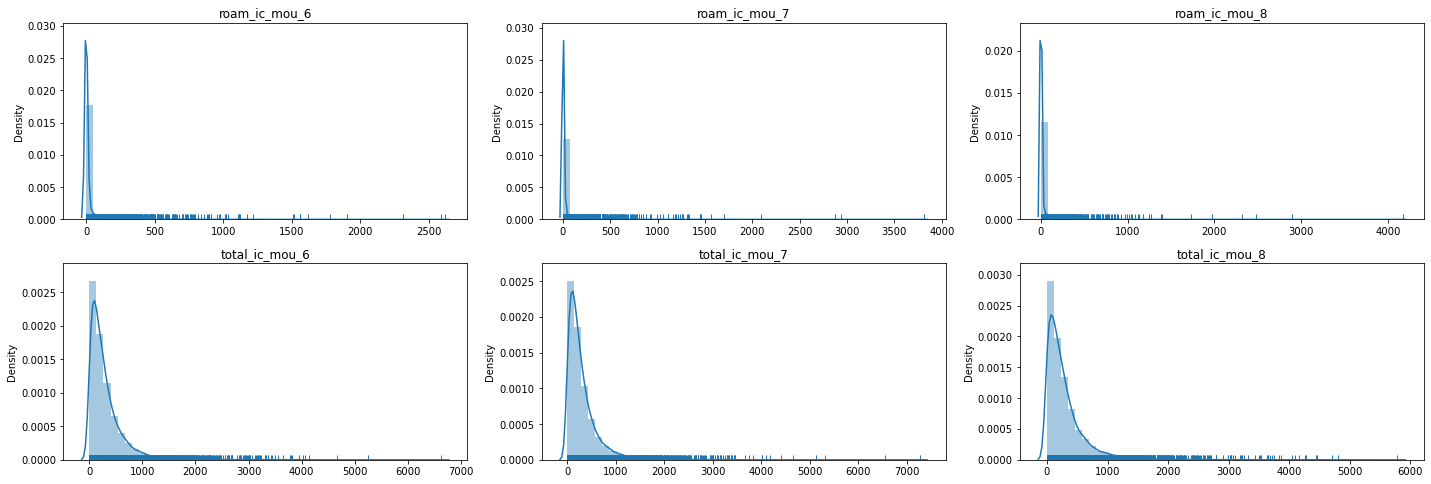

In [64]:
plotDistribution(ic_data)

Columns related to average revenue per user for good & action phase

In [65]:
arpu_data =  high_val_customers.columns[high_val_customers.columns.str.contains('arpu')]
arpu_data

Index(['arpu_6', 'arpu_7', 'arpu_8', 'diff_arpu', 'decrease_arpu_action'], dtype='object')

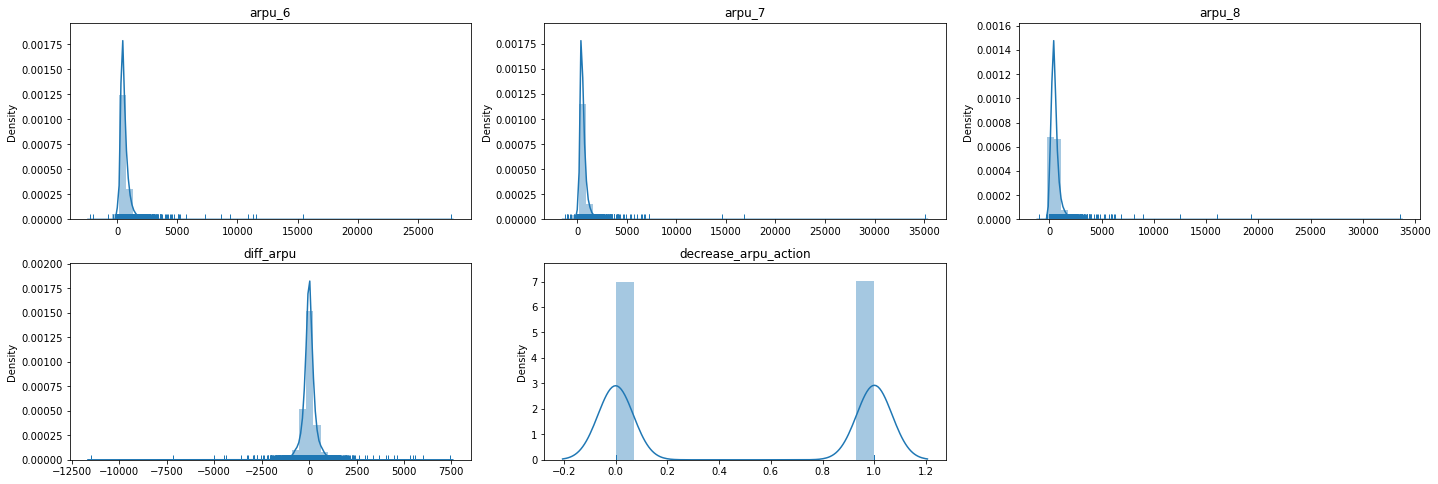

In [66]:
plotDistribution(arpu_data)

In [67]:
high_val_customers.columns[high_val_customers.columns.str.contains("og")]

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'],
      dtype='object')

In [200]:
len(high_val_customers.columns[high_val_customers.columns.str.contains("og")])

42

In [214]:
def UnvrBoxPlots(num):
    i=1
    plt.figure(figsize=(20, 50))
    for var in num:
        plt.subplot(20,3,i)
        sns.boxplot(high_val_customers[var])
        i=i+1
    plt.tight_layout()
    plt.show()

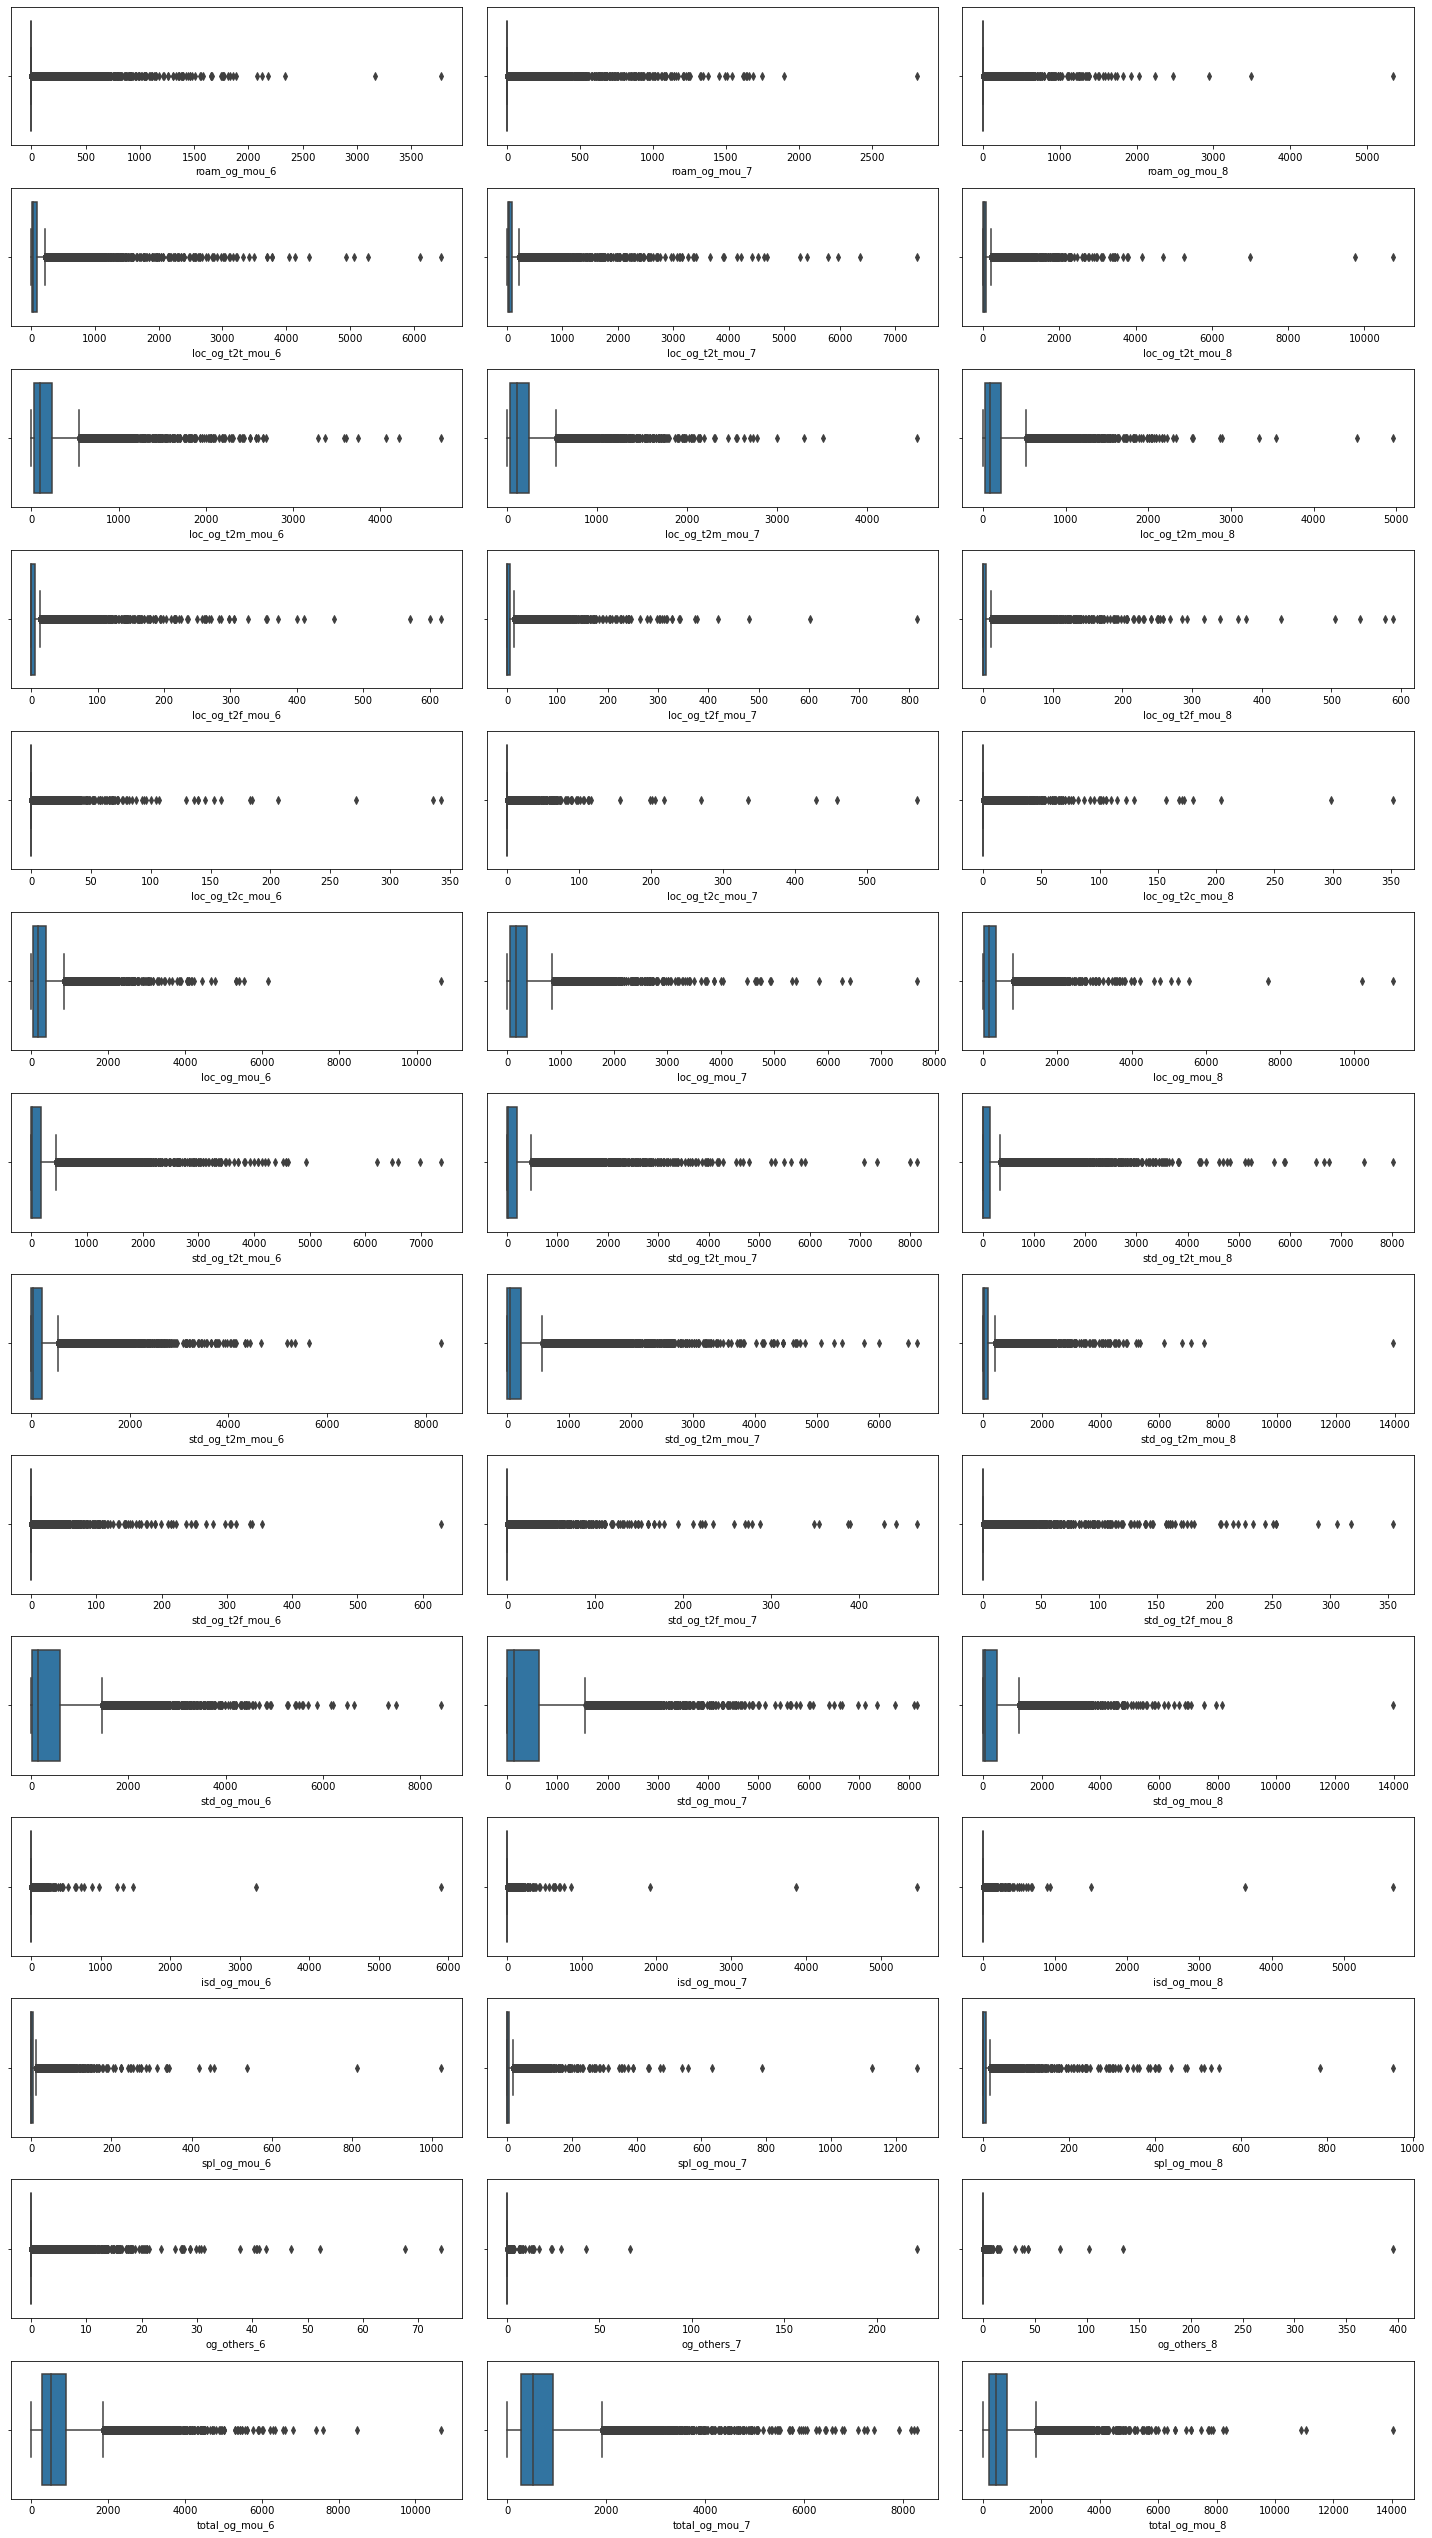

In [215]:
UnvrBoxPlots(high_val_customers.columns[high_val_customers.columns.str.contains("og")])
# Able to observe many outliers on all the plots

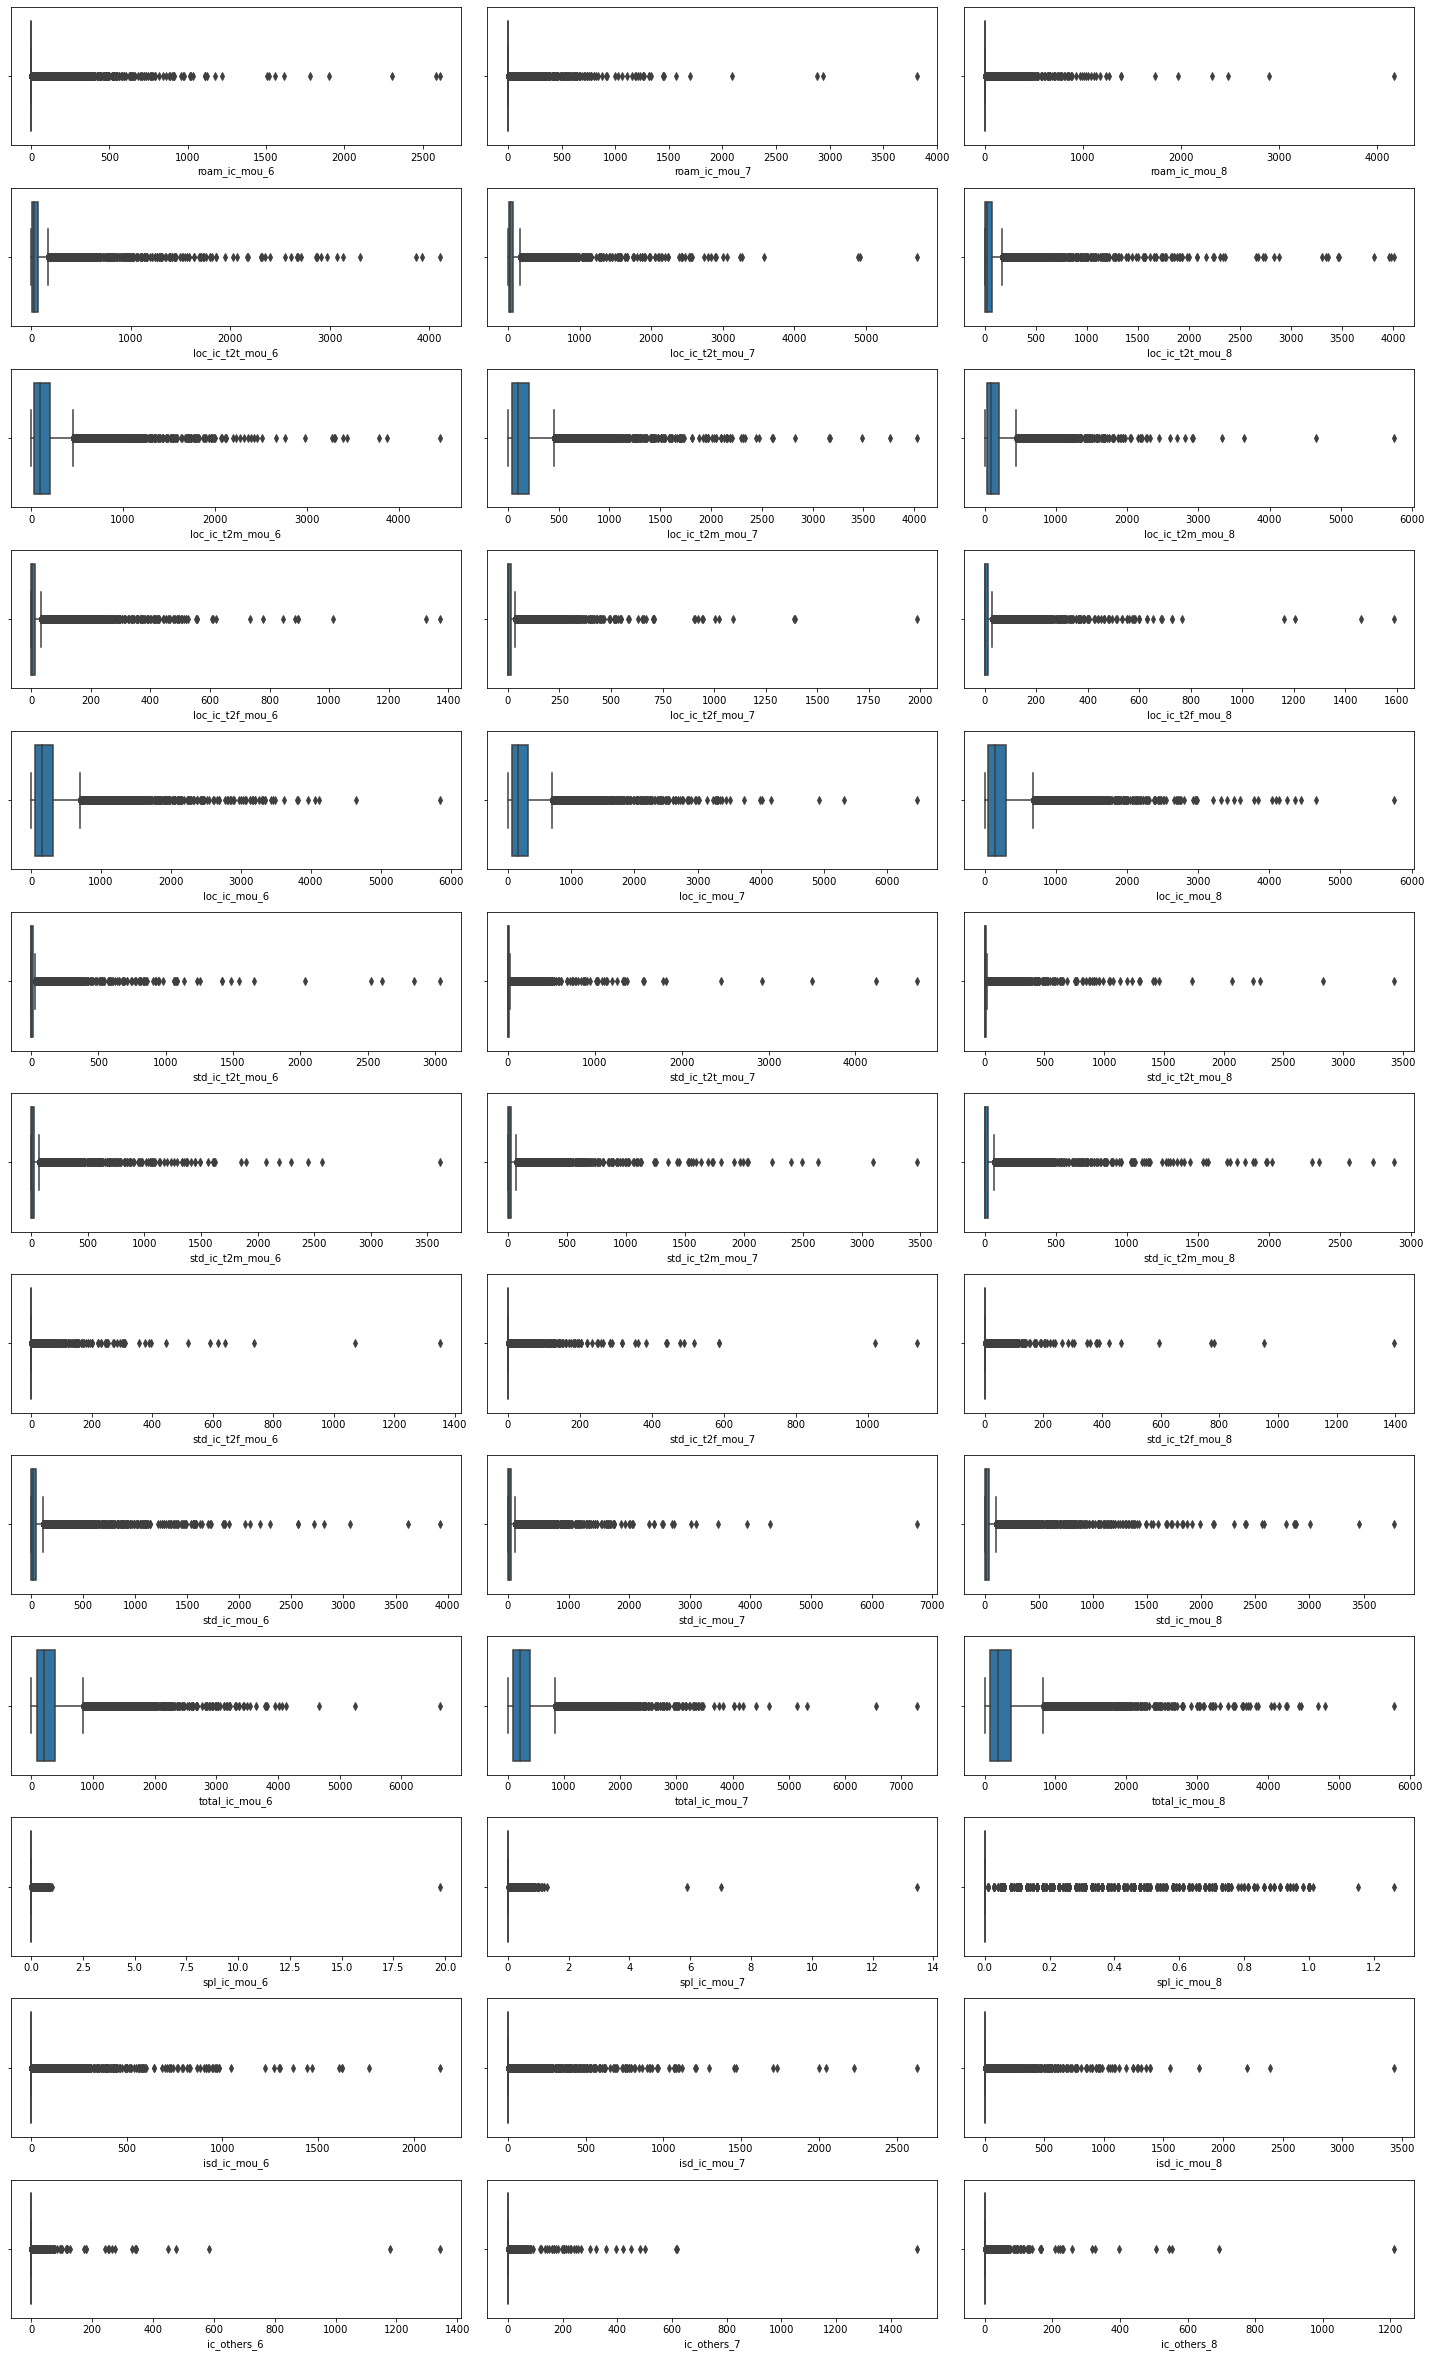

In [216]:
UnvrBoxPlots(high_val_customers.columns[high_val_customers.columns.str.contains("ic")])

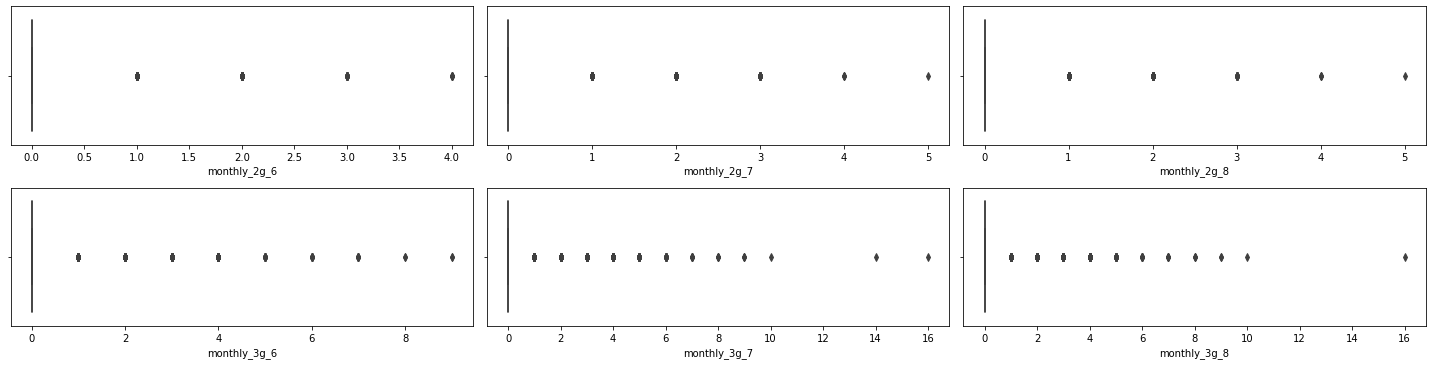

In [217]:
UnvrBoxPlots(high_val_customers.columns[high_val_customers.columns.str.contains("monthly")])

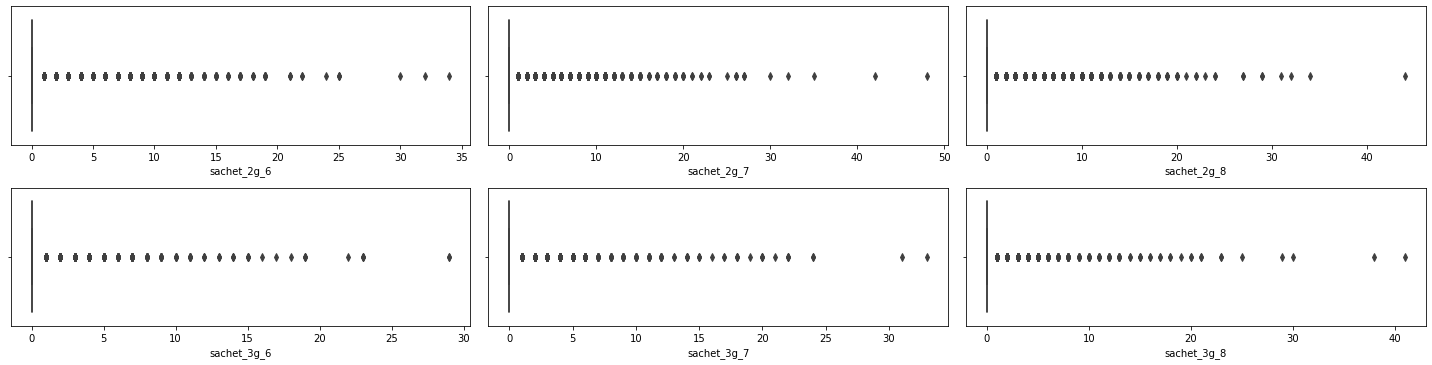

In [218]:
UnvrBoxPlots(high_val_customers.columns[high_val_customers.columns.str.contains("sachet")])

Outliers in All kind of calls within the same operator network in all the months

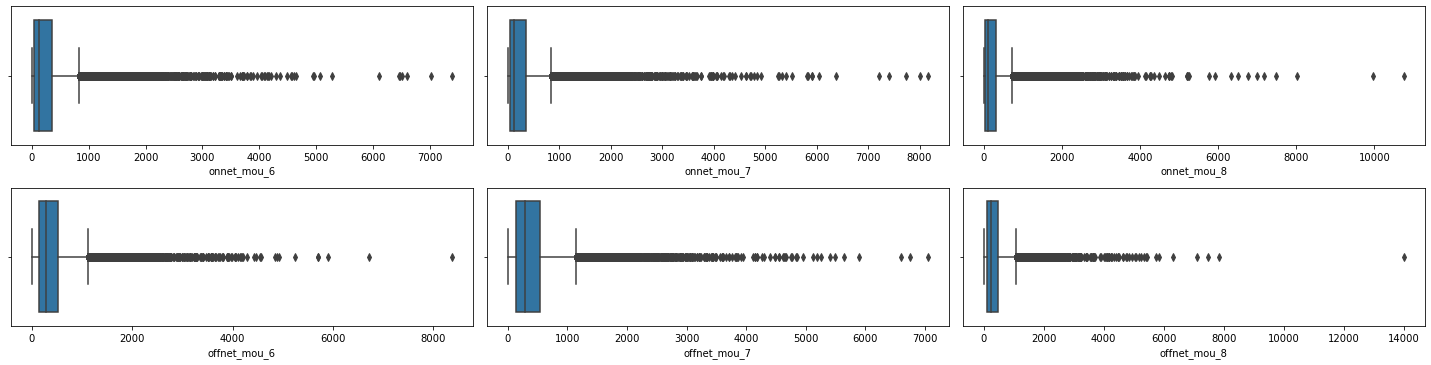

In [219]:
UnvrBoxPlots(high_val_customers.columns[high_val_customers.columns.str.contains("net")])

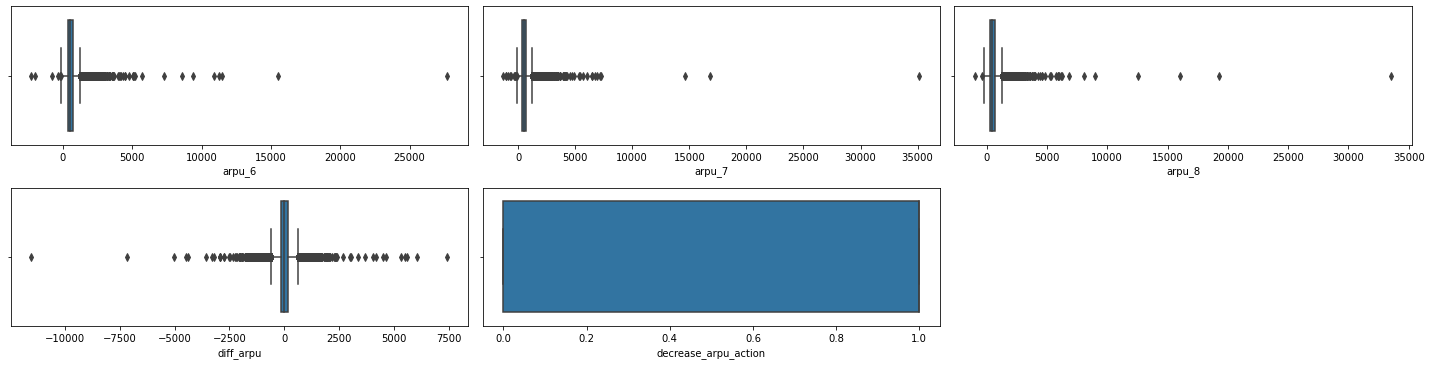

In [220]:
UnvrBoxPlots(high_val_customers.columns[high_val_customers.columns.str.contains("arpu")])


#### Observing categorical columns

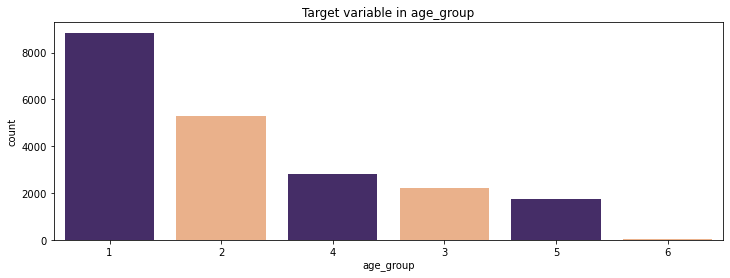

In [75]:
for i in categorical_columns:
    if (i != 'churn')|(i != 'age_group'):
        plt.figure(figsize =(12,4))
        sns.countplot(high_val_customers[i],palette=['#432371',"#FAAE7B"])
        plt.title('Target variable in'+' '+ i)
        plt.xlabel(i)
        plt.show()

In [ ]:
# The churn rate is higher when people are in the company for a very less time, long time customers are less likely to churn

<AxesSubplot:xlabel='age_group', ylabel='count'>

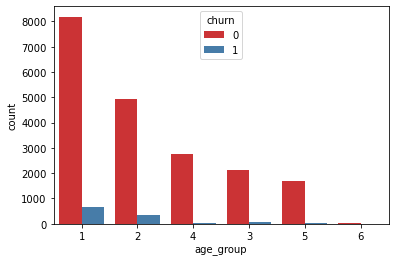

In [76]:
sns.countplot(high_val_customers['age_group'], hue = high_val_customers['churn'], palette="Set1")

#### Bivariate Analysis

In [77]:
def bivar_plot(var1, var2,fig):
    plt.figure(figsize = (20,15))
    plt.subplot(4,2, fig)
    if var1.dtype != 'object' and var2.dtype != 'object':
        sns.regplot(var1, var2)
    elif (var1.dtype == 'object' and var2.dtype != 'object') or (var1.dtype != 'object' and var2.dtype == 'object'):        
        sns.boxplot(var1, var2,palette=['#432371',"#FAAE7B"])

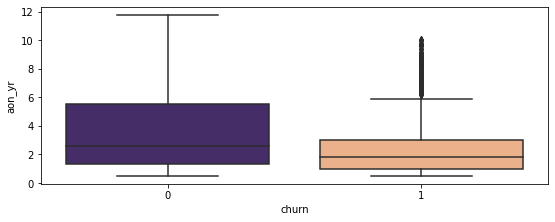

In [78]:
bivar_plot(high_val_customers.churn, high_val_customers.aon_yr,1)

# People who are in the company for very less period of time are more likely to churn

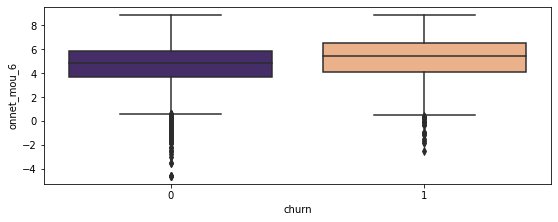

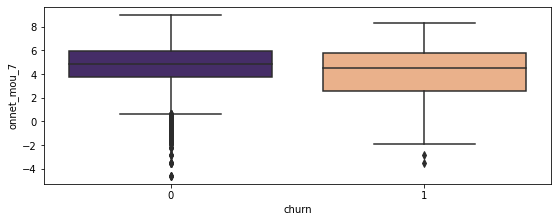

In [79]:
bivar_plot(high_val_customers.churn, np.log(high_val_customers.onnet_mou_6),1)
bivar_plot(high_val_customers.churn, np.log(high_val_customers.onnet_mou_7),2)


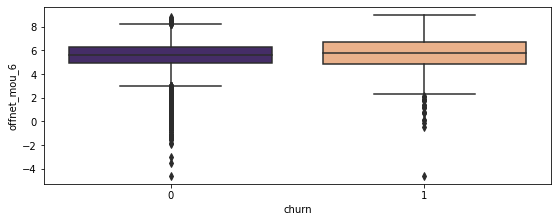

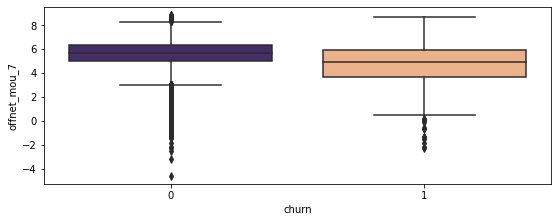

In [80]:
bivar_plot(high_val_customers.churn, np.log(high_val_customers.offnet_mou_6),1)
bivar_plot(high_val_customers.churn, np.log(high_val_customers.offnet_mou_7),2)


People who have churned, used most of the calling in month of June and July on different network

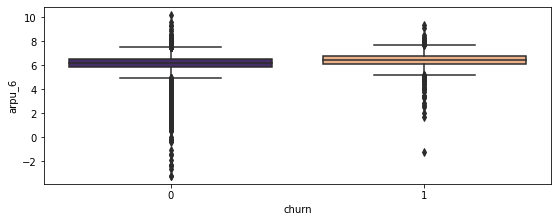

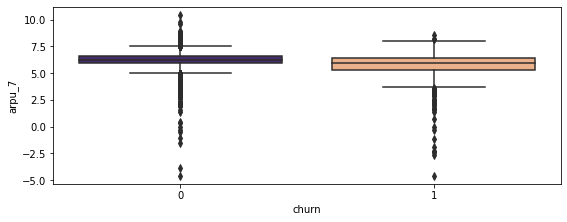

In [81]:
bivar_plot(high_val_customers.churn, np.log(high_val_customers.arpu_6),1)
bivar_plot(high_val_customers.churn, np.log(high_val_customers.arpu_7),2)


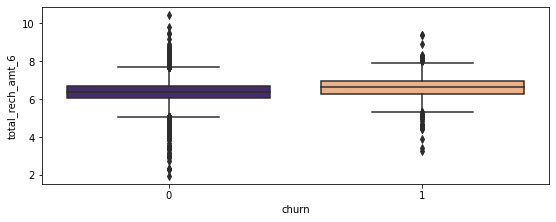

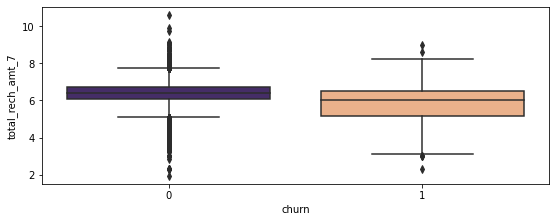

In [82]:
bivar_plot(high_val_customers.churn, np.log(high_val_customers.total_rech_amt_6),1)
bivar_plot(high_val_customers.churn, np.log(high_val_customers.total_rech_amt_7),2)

#### Multivariate EDA

In [221]:
cor_matrix = high_val_customers.corr()
print(cor_matrix)

                            id    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
id                    1.000000  0.000185  0.003427  0.007845     0.004372   
arpu_6                0.000185  1.000000  0.662560  0.592533     0.287830   
arpu_7                0.003427  0.662560  1.000000  0.765181     0.138498   
arpu_8                0.007845  0.592533  0.765181  1.000000     0.084231   
onnet_mou_6           0.004372  0.287830  0.138498  0.084231     1.000000   
onnet_mou_7           0.007541  0.142237  0.263629  0.175784     0.716532   
onnet_mou_8           0.006336  0.121480  0.215429  0.302750     0.591985   
offnet_mou_6         -0.014111  0.450656  0.269467  0.204762     0.006049   
offnet_mou_7         -0.011723  0.254510  0.430003  0.317212    -0.053823   
offnet_mou_8         -0.006392  0.204099  0.333910  0.479664    -0.044491   
roam_ic_mou_6         0.002637  0.111933  0.074282  0.066912     0.010300   
roam_ic_mou_7        -0.008548  0.061176  0.075584  0.057870     0.013496   

<AxesSubplot:>

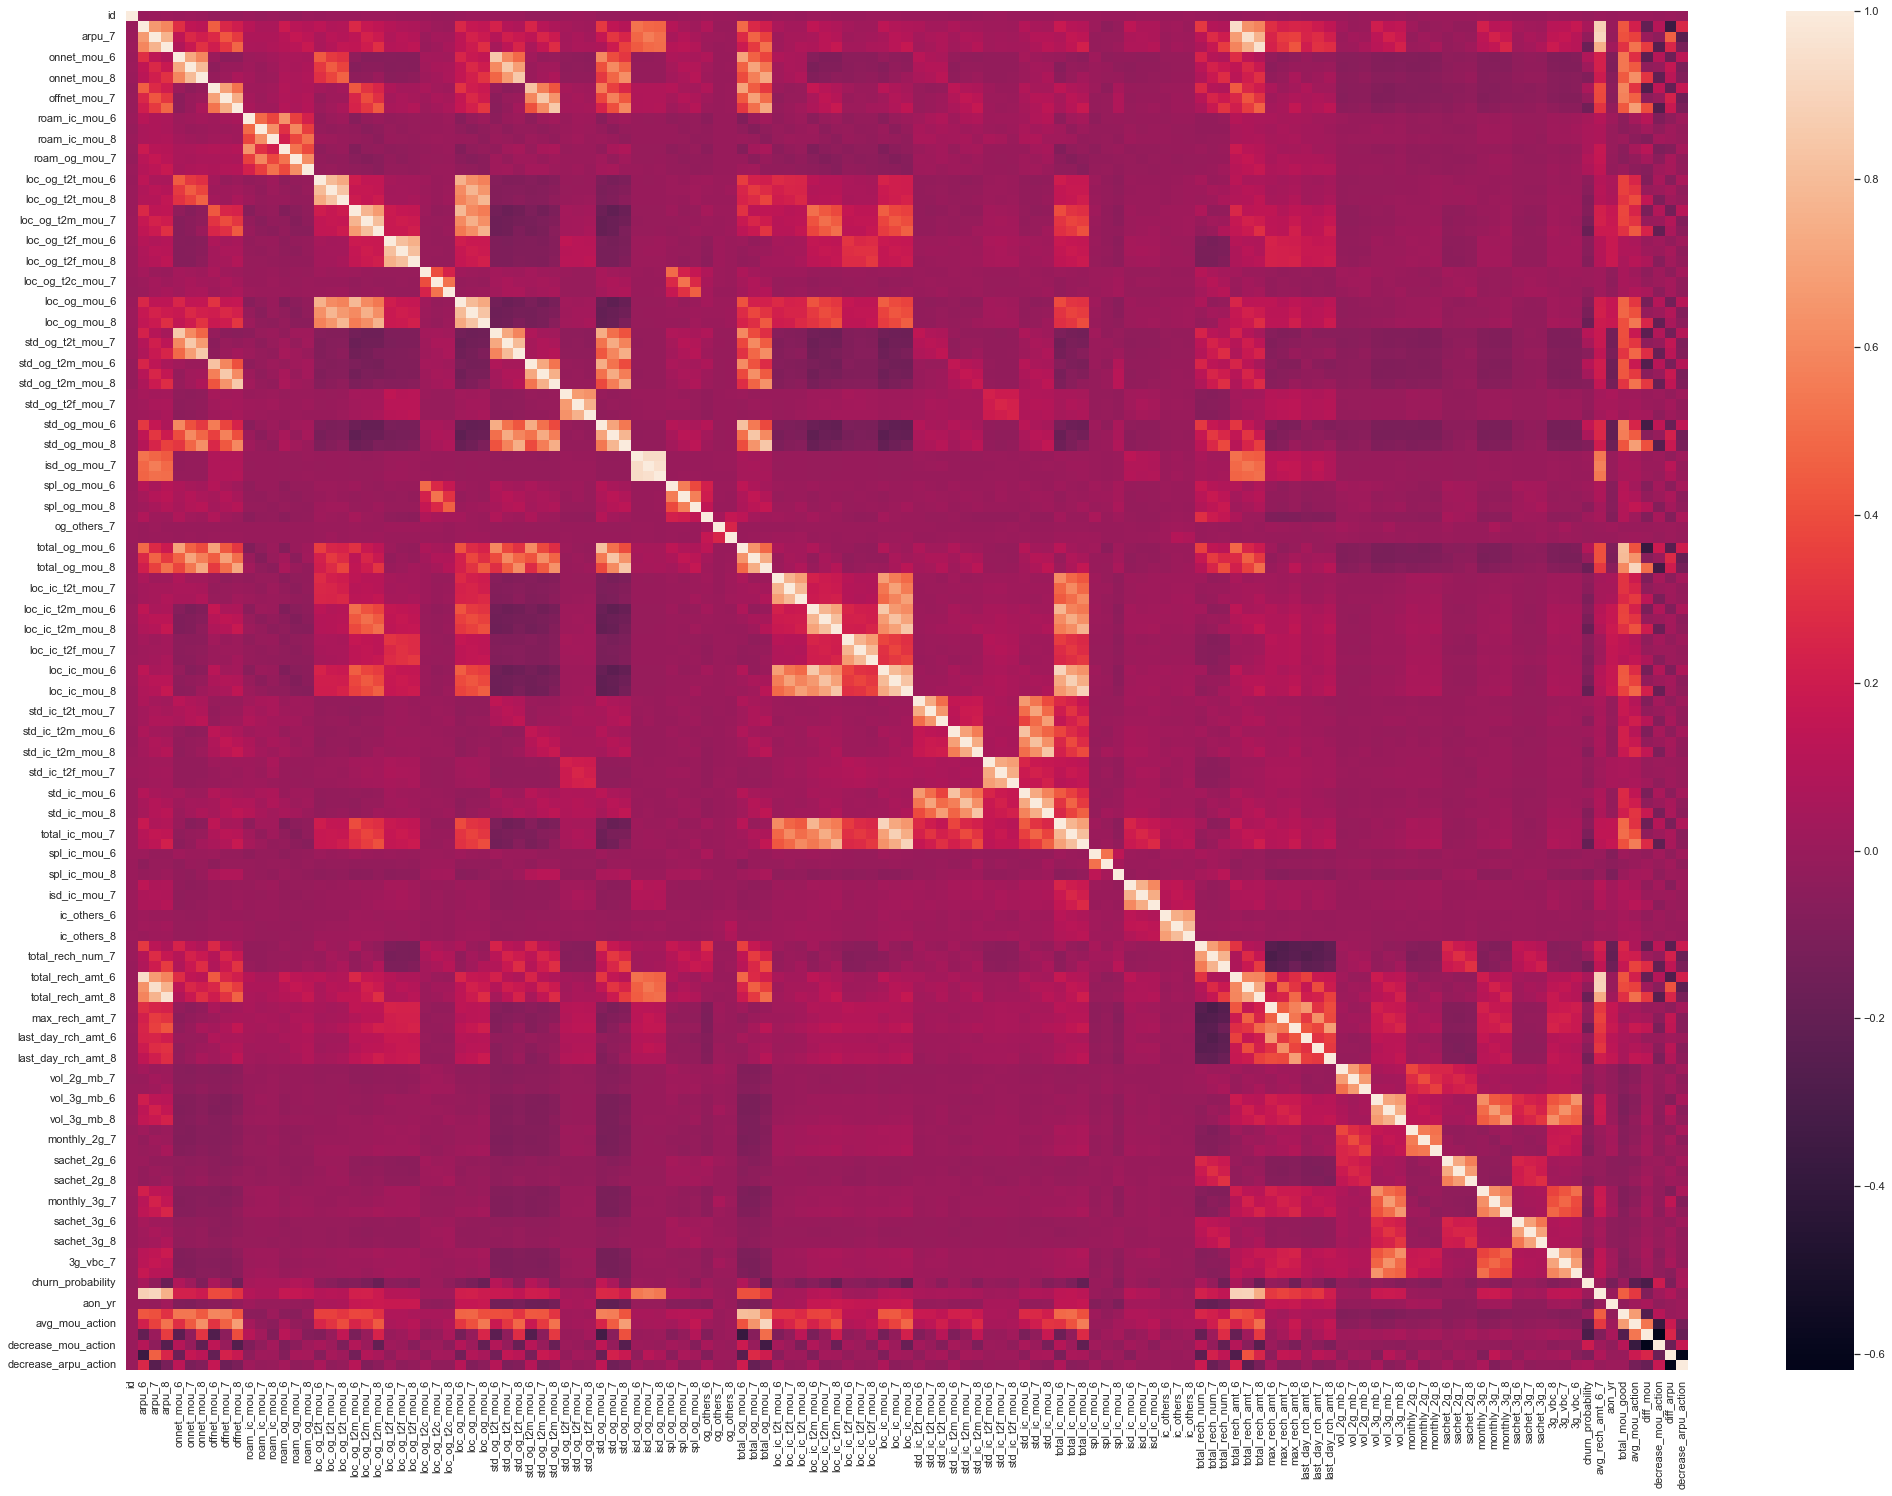

In [222]:
sns.set (rc = {'figure.figsize':(35, 25)})
sns.heatmap(cor_matrix)


### 4. Data Modeling and Model Evaluation

#### 1) Copying data and changing Data type

In [83]:
#Replacing  original data with treated data
high_logreg = high_val_customers.copy()
#changing churn column to numeric
high_logreg.churn= high_logreg.churn.astype("int")

In [84]:
high_logreg.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,3g_vbc_8,3g_vbc_7,3g_vbc_6,churn_probability,avg_rech_amt_6_7,churn,aon_yr,age_group,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,diff_arpu,decrease_arpu_action
12,12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,469.5,0,0.9,1,861.250,714.40,-146.850,1,-41.973,1
15,15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,527.0,0,1.6,1,852.500,1021.47,168.970,0,-203.255,1
23,23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,1205.0,0,1.2,1,1511.360,591.10,-920.260,1,-225.442,1
24,24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,

In [85]:
#Creating Dummies 
dummies = pd.get_dummies(high_logreg[categorical_columns], drop_first=True)
dummies.head()

,age_group_2,age_group_3,age_group_4,age_group_5,age_group_6
12,0,0,0,0,0
15,0,0,0,0,0
23,0,0,0,0,0
24,1,0,0,0,0
25,0,0,1,0,0


In [86]:
dummies.shape

(20938, 5)

In [87]:
#concatenating the dummy variables with Original DataFrame
high_logreg = pd.concat([high_logreg,dummies], axis =1)
high_logreg.shape

(20938, 140)

In [88]:
# drop duplicate columns
high_logreg.drop(categorical_columns,axis =1, inplace = True)

high_logreg.shape

(20938, 139)

#### Test Train Split

In [89]:
# Putting response variable to y
y = high_logreg.pop('churn_probability')

# Putting feature variables to X
X = high_logreg.drop(['id'],1)

In [90]:
print("Size of Feature variables dataset is:",X.shape)
print("Size of response variable dataset is:",y.shape)

Size of Feature variables dataset is: (20938, 137)
Size of response variable dataset is: (20938,)


In [91]:
# Split data into train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [92]:
#treating imbalance in the data with SMOTE 
from imblearn.over_sampling import SMOTE

In [93]:
sm = SMOTE(random_state=27)

In [94]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [95]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26764, 137), (6282, 137), (26764,), (6282,))

In [96]:
# Getting all numerical column except churn
num_var = X_train.select_dtypes(exclude='object').drop(dummies.columns,1)
num_var = num_var.drop("churn",axis=1)

num_col = num_var.columns

In [97]:
num_col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       '3g_vbc_7', '3g_vbc_6', 'avg_rech_amt_6_7', 'aon_yr', 'total_mou_good',
       'avg_mou_action', 'diff_mou', 'decrease_mou_action', 'diff_arpu',
       'decrease_arpu_action'],
      dtype='object', length=131)

In [98]:
## Scaling the train and test data
scale = StandardScaler()
X_train[num_col] = scale.fit_transform(X_train[num_col])
X_test[num_col] = scale.transform(X_test[num_col])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,3g_vbc_8,3g_vbc_7,3g_vbc_6,avg_rech_amt_6_7,churn,aon_yr,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,diff_arpu,decrease_arpu_action,age_group_2,age_group_3,age_group_4,age_group_5,age_group_6
0,0.451993,-0.469267,1.557022,-0.641814,-0.625864,-0.450300,0.971644,0.430521,2.341265,-0.235191,-0.237719,-0.252033,-0.269252,-0.268543,-0.237045,-0.304509,-0.351567,-0.213158,3.445304,2.178110,5.619225,-0.183971,-0.106258,-0.114796,-0.266820,-0.242604,-0.220078,2.058691,1.169435,3.442230,-0.523734,-0.489809,-0.370790,-0.515254,-0.514455,-0.341570,0.013398,0.187715,-0.132517,-0.726131,-0.690254,-0.474674,-0.109079,-0.096123,-0.078241,-0.319209,-0.343708,-0.268094,-0.386551,-0.02349,-0.011587,0.256429,-0.114486,1.274689,-0.125416,-0.329953,-0.060160,0.861680,0.156214,0.562637,0.251047,0.011252,0.364408,0.578928,-0.061335,0.406112,-0.245342,-0.221177,-0.177894,-0.003459,-0.211800,-0.226023,0.647918,0.080777,-0.041945,-0.059970,-0.264674,-0.262081,0.449237,-0.192907,0.240979,-0.470481,-0.181712,-0.197656,-0.186262,-0.191570,-0.037615,-0.082863,-0.087843,-0.07608,-0.419327,-0.509871,0.262924,0.235509,0.220573,1.468821,-0.187886,-0.175340,0.297391,0.221311,0.315267,0.550818,-0.260754,-0.260560,-0.208182,-0.259808,-0.26244,-0.229886,-0.249006,-0.257716,-0.232753,-0.261219,-0.261975,-0.261050,-0.248888,-0.240787,-0.21933,-0.141293,-0.142228,-0.109589,-0.257224,-0.279934,-0.27429,0.278457,0,-0.473454,0.137518,1.126363,1.075449,-1.532322,-0.834691,0.984944,0,0,0,0,0
1,-0.583445,-0.544583,0.133267,1.504810,0.685743,0.339382,0.527094,-0.656413,0.073598,-0.235191,-0.237719,-0.252033,-0.269252,-0.268543,-0.237045,5.102109,2.838343,1.582782,2.454446,-0.222426,0.932612,-0.157144,-0.272041,-0.266449,1.061419,-0.242604,0.770345,4.775272,1.624245,1.536724,-0.523734,-0.489809,-0.370790,-0.521030,-0.534862,-0.400629,-0.141333,-0.140426,-0.132517,-0.732652,-0.709252,-0.512088,-0.109079,-0.096123,-0.078241,0.076061,-0.343708,0.333236,-0.386551,-0.02349,-0.011587,1.546309,0.082423,0.323160,-0.116882,-0.127377,0.186335,-0.339049,-0.473279,-0.178888,-0.216502,-0.277567,-0.262967,-0.321415,-0.424689,-0.067582,-0.245342,-0.221177,-0.177894,-0.358811,-0.301422,-0.262959,-0.108394,-0.130163,-0.119352,-0.409344,-0.356745,-0.298748,-0.463061,-

In [99]:
X_train['churn'].unique()

array([0, 1])

####  Applying PCA


In [100]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state = 42)

In [101]:
#Performing PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [102]:
# Let us observe pricipal components created
print("The Principal components are:")
pca.components_

The Principal components are:


array([[ 8.24641772e-02,  1.51977347e-01,  1.81555132e-01, ...,
         1.27426441e-02,  8.38105081e-03,  3.12178188e-04],
       [ 9.15360003e-02,  1.06238377e-01,  6.17912576e-02, ...,
        -1.36327748e-02, -9.84429548e-03, -4.06361347e-04],
       [-2.06831532e-02,  1.30658120e-01,  1.69709771e-01, ...,
         4.12767972e-04,  1.04540607e-03,  1.34802515e-04],
       ...,
       [ 0.00000000e+00,  8.93540724e-16,  2.13937518e-17, ...,
        -7.17279952e-17, -4.41716500e-17,  1.55413341e-16],
       [ 0.00000000e+00, -8.07944502e-17,  3.63811893e-17, ...,
         1.19697605e-16,  2.61710340e-16,  4.42022950e-17],
       [ 5.69384640e-01, -5.45497017e-01, -2.49800181e-16, ...,
         3.51281504e-17, -2.60208521e-18,  4.79217360e-17]])

In [103]:
# Let us also look at the variance ratio
var_ratio = np.round((pca.explained_variance_ratio_) * 100,2)
var_ratio

array([1.114e+01, 8.140e+00, 5.590e+00, 4.600e+00, 4.120e+00, 3.680e+00,
       3.360e+00, 2.720e+00, 2.490e+00, 2.340e+00, 2.270e+00, 2.220e+00,
       2.070e+00, 1.920e+00, 1.900e+00, 1.830e+00, 1.650e+00, 1.490e+00,
       1.410e+00, 1.310e+00, 1.280e+00, 1.260e+00, 1.110e+00, 1.090e+00,
       1.060e+00, 9.500e-01, 9.200e-01, 8.500e-01, 8.300e-01, 7.900e-01,
       7.900e-01, 7.800e-01, 7.500e-01, 7.100e-01, 7.000e-01, 6.800e-01,
       6.600e-01, 6.600e-01, 6.300e-01, 6.000e-01, 5.900e-01, 5.800e-01,
       5.500e-01, 5.400e-01, 5.200e-01, 5.100e-01, 5.000e-01, 4.800e-01,
       4.500e-01, 4.400e-01, 4.300e-01, 4.200e-01, 4.100e-01, 4.000e-01,
       3.900e-01, 3.700e-01, 3.700e-01, 3.600e-01, 3.500e-01, 3.400e-01,
       3.200e-01, 3.200e-01, 3.000e-01, 2.900e-01, 2.800e-01, 2.800e-01,
       2.700e-01, 2.700e-01, 2.600e-01, 2.600e-01, 2.600e-01, 2.400e-01,
       2.200e-01, 2.100e-01, 2.000e-01, 2.000e-01, 1.900e-01, 1.900e-01,
       1.800e-01, 1.800e-01, 1.700e-01, 1.700e-01, 

In [104]:
var_cum = np.cumsum(var_ratio)
var_cum

array([ 11.14,  19.28,  24.87,  29.47,  33.59,  37.27,  40.63,  43.35,
        45.84,  48.18,  50.45,  52.67,  54.74,  56.66,  58.56,  60.39,
        62.04,  63.53,  64.94,  66.25,  67.53,  68.79,  69.9 ,  70.99,
        72.05,  73.  ,  73.92,  74.77,  75.6 ,  76.39,  77.18,  77.96,
        78.71,  79.42,  80.12,  80.8 ,  81.46,  82.12,  82.75,  83.35,
        83.94,  84.52,  85.07,  85.61,  86.13,  86.64,  87.14,  87.62,
        88.07,  88.51,  88.94,  89.36,  89.77,  90.17,  90.56,  90.93,
        91.3 ,  91.66,  92.01,  92.35,  92.67,  92.99,  93.29,  93.58,
        93.86,  94.14,  94.41,  94.68,  94.94,  95.2 ,  95.46,  95.7 ,
        95.92,  96.13,  96.33,  96.53,  96.72,  96.91,  97.09,  97.27,
        97.44,  97.61,  97.77,  97.93,  98.09,  98.24,  98.39,  98.53,
        98.66,  98.79,  98.92,  99.04,  99.15,  99.26,  99.36,  99.45,
        99.53,  99.61,  99.68,  99.75,  99.81,  99.86,  99.9 ,  99.94,
        99.97,  99.99, 100.  , 100.01, 100.01, 100.01, 100.01, 100.01,
      

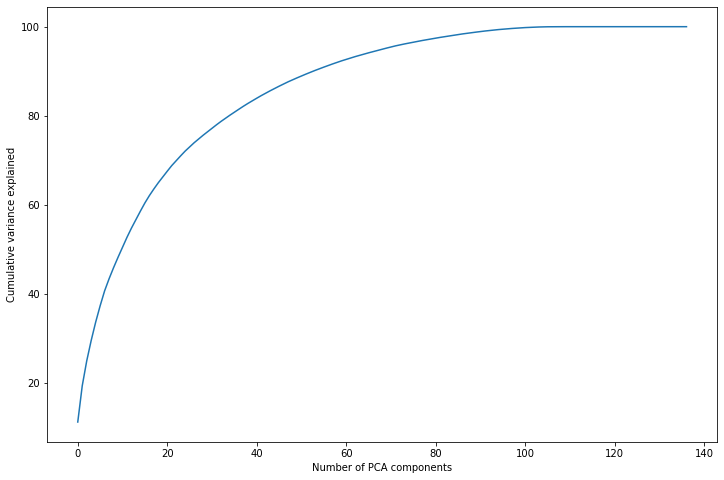

In [105]:
fig = plt.figure(figsize=[12,8])

plt.plot(var_cum)
plt.xlabel('Number of PCA components')
plt.ylabel("Cumulative variance explained")
plt.show()

### Adopting Incremental PCA

Let us Build the dataframe using Incremental PCA for better efficiency.


In [223]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 70)

X_train_pca = pca_final.fit_transform(X_train)

In [224]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (26764, 137)
Size of dataset after PCA is: (26764, 70)


In [225]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.022 , min negative corr:  -0.024


In [226]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(6282, 70)

#### Model 1- PCA and Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model.
# default solver is very slow so changed to 'lbfgs'
lr = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [228]:
X_train_pca.shape, y_train.shape

((26764, 70), (26764,))

In [229]:
# Training the model on the data
lr.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [230]:
#prediction on test data
y_pred = lr.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[4701 1035]
 [ 105  441]]
sensitivity 	 0.81
specificity 	 0.82
area under the curve 	 0.81


In [231]:
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced")
penalty = ['l1', 'l2','elasticnet']
C = [0.0001, 0.001, 0.005,0.01,0.05, 0.1, 1, 10, 100,1000,1100,1500]

param_grid = dict(penalty=penalty,
                  C=C)

# #creating 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4) 

#GradientSearchCV
logreg_model =  GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    cv = folds,
                    verbose=1,
                    n_jobs=-1)

In [232]:
#model fitting
logreg_model.fit(X_train_pca,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10,
                               100, 1000, 1100, 1500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [233]:
# print best hyperparameters
print("Best AUC: ", logreg_model.best_score_)
print("Best hyperparameters: ", logreg_model.best_params_)

Best AUC:  0.9232483168076582
Best hyperparameters:  {'C': 100, 'penalty': 'l2'}


In [234]:
#fitting the model with best parameters
logistic = LogisticRegression(solver = 'lbfgs',class_weight= "balanced", C = logreg_model.best_params_['C'],penalty=logreg_model.best_params_['penalty'])
logreg_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 10,
                               100, 1000, 1100, 1500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc', verbose=1)

In [235]:
#prediction on test data
y_pred = logreg_model.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = logreg_model.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[4701 1035]
 [ 105  441]]
sensitivity 	 0.81
specificity 	 0.82
AUC:    	 0.87


#### Model 2- PCA and Random Forest

In [236]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [237]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [238]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [239]:
print(accuracy_score(y_test,predictions))

0.9043298312639287


In [240]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[5393  343]
 [ 258  288]]


In [243]:
#Note: The Below GridSearch Step will take almost 30-35 mins to run.
# Create the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [8, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [244]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [245]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8537964312394909 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [246]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],n_estimators =grid_search.best_params_['n_estimators'], random_state=100)


In [247]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=300,
                       random_state=100)

In [248]:
# predict
predictions = rfc.predict(X_test_pca)

In [249]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      5736
           1       0.37      0.68      0.48       546

    accuracy                           0.87      6282
   macro avg       0.67      0.78      0.70      6282
weighted avg       0.92      0.87      0.89      6282



In [250]:
#create confusion matrix
cm = confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

confusoin matrix 	
 [[5115  621]
 [ 176  370]]
sensitivity 	 0.68
specificity 	 0.89
AUC:    	 0.88


### 6.Feature Importance

In [251]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
fimodel = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [252]:
# fit model
fimodel.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [253]:
# print best hyperparameters
print("Best AUC: ", fimodel.best_score_)
print("Best hyperparameters: ", fimodel.best_params_)

Best AUC:  0.9928739513399834
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [254]:
# predict churn on test data
y_pred = fimodel.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = fimodel.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5476  260]
 [ 182  364]]
sensitivity 	 0.67
specificity 	 0.95
AUC:    	 0.93


In [255]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rfimp_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [256]:
rfimp_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [257]:
rfimp_model.oob_score_

0.9624121954864744

In [258]:
# predict churn on test data
y_pred = rfimp_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfimp_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[5479  257]
 [ 204  342]]
sensitivity 	 0.63
specificity 	 0.96
AUC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [259]:
importance = rfimp_model.feature_importances_
importance

array([5.79816901e-03, 6.79701035e-03, 1.93546111e-02, 4.33338854e-03,
       5.56468750e-03, 7.16895684e-03, 4.98618000e-03, 5.30099680e-03,
       9.82059659e-03, 3.82793844e-03, 3.22444577e-03, 4.97653899e-02,
       2.99835837e-03, 5.29308246e-03, 6.55333080e-02, 5.35015124e-03,
       5.64813357e-03, 1.11445816e-02, 5.05611390e-03, 6.53251759e-03,
       2.08864587e-02, 3.55564861e-03, 3.98475661e-03, 4.34259677e-03,
       2.77365836e-03, 3.17350653e-03, 3.38888768e-03, 4.12574378e-03,
       5.72323431e-03, 2.31710821e-02, 7.09500890e-03, 9.67544166e-03,
       8.66115586e-03, 4.50673904e-03, 7.26073866e-03, 5.37866548e-03,
       3.59717000e-03, 1.74270688e-03, 2.16339190e-03, 4.66714787e-03,
       6.42743834e-03, 7.32889602e-03, 1.93636451e-03, 2.43640480e-03,
       1.43651238e-03, 5.34486505e-03, 9.91499539e-03, 5.06005865e-03,
       4.08979287e-03, 1.07618304e-04, 3.07300299e-04, 5.70612700e-03,
       5.15146032e-03, 1.22732529e-02, 4.34480564e-03, 5.10502131e-03,
      

In [260]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rfimp_model.feature_importances_
})

In [261]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
14,roam_og_mou_8,0.065533
11,roam_ic_mou_8,0.049765
101,last_day_rch_amt_8,0.040769
128,diff_mou,0.032100
65,loc_ic_mou_8,0.031060
80,total_ic_mou_8,0.029780
59,loc_ic_t2m_mou_8,0.024311
29,loc_og_mou_8,0.023171
95,total_rech_amt_8,0.022584
20,loc_og_t2m_mou_8,0.020886


Based on the above observations we are able to  get that the top 5 contributors are 

1.roam_og_mou_8	
2.roam_ic_mou_8	
3.last_day_rch_amt_8	
4.diff_mou	
5.loc_ic_mou_8	

Selecing Model 3 to predict the Test data as it has more AUC

### 6. Prediction on Test Data 


Applying same steps applied on the train data

In [143]:
test_data =pd.read_csv('test.csv')

In [144]:
test_data_missing_columns = (round(((test_data.isnull().sum()/len(test_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
test_data_missing_columns

,null
arpu_3g_6,74.72
count_rech_3g_6,74.72
fb_user_6,74.72
night_pck_user_6,74.72
total_rech_data_6,74.72
max_rech_data_6,74.72
count_rech_2g_6,74.72
date_of_last_rech_data_6,74.72
av_rech_amt_data_6,74.72
arpu_2g_6,74.72


In [145]:
# Delete the columns having more than 30% missing values
test_data = test_data.drop(col_list_missing_30, axis=1)

In [146]:
date_column_test= [column for column in test_data.columns if 'date' in column]

for i in test_data[date_column_test]:
    test_data[i] = pd.to_datetime(test_data[i])

In [147]:
test_data.isnull().sum()

id                         0
circle_id                  0
loc_og_t2o_mou           316
std_og_t2o_mou           316
loc_ic_t2o_mou           316
last_date_of_month_6       0
last_date_of_month_7     202
last_date_of_month_8     367
arpu_6                     0
arpu_7                     0
arpu_8                     0
onnet_mou_6             1169
onnet_mou_7             1172
onnet_mou_8             1675
offnet_mou_6            1169
offnet_mou_7            1172
offnet_mou_8            1675
roam_ic_mou_6           1169
roam_ic_mou_7           1172
roam_ic_mou_8           1675
roam_og_mou_6           1169
roam_og_mou_7           1172
roam_og_mou_8           1675
loc_og_t2t_mou_6        1169
loc_og_t2t_mou_7        1172
loc_og_t2t_mou_8        1675
loc_og_t2m_mou_6        1169
loc_og_t2m_mou_7        1172
loc_og_t2m_mou_8        1675
loc_og_t2f_mou_6        1169
loc_og_t2f_mou_7        1172
loc_og_t2f_mou_8        1675
loc_og_t2c_mou_6        1169
loc_og_t2c_mou_7        1172
loc_og_t2c_mou

In [148]:
# Dropping columns with unique values.
test_columns = []
for i in test_data.columns:
    if test_data[i].nunique() ==1:
        test_columns.append(i)
test_data = test_data.drop(test_columns,1)
test_data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,2014-06-21,2014-07-26,2014-08-24,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,2014-06-19,2014-07-16,2014-08-24,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,500,1000,1000,300,500,500,2014-06-29,2014-07-27,2014-08-28,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84
3,70002,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,2

In [149]:
# While all other columns have utilised the integers "6,7,8,9" to indicate month name, certain columns representing volume-based users have month specified in their names.
alphabetic_month = ['aug_vbc_3g','jul_vbc_3g','jun_vbc_3g']
test_data = test_data.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6'})

In [150]:
test_data['avg_rech_amt_6_7'] = (test_data['total_rech_amt_6'] + test_data['total_rech_amt_7'])/2

In [154]:
# Let us create a seperate category for categorical columns
test_categorical_columns = []

for i in test_data.columns:
    if test_data[i].nunique()== 2:
        test_categorical_columns.append(i)
test_categorical_columns 

[]

In [152]:
test_data_cpy = test_data.copy()

In [153]:
# let us filter churned customers based on the third month

test_data_cpy['churn'] = test_data_cpy.apply(lambda x: 1 if (x.total_ic_mou_8 == 0 and x.total_og_mou_8 == 0 and x.vol_2g_mb_8 ==0 and x.vol_3g_mb_8==0) else 0, axis=1)
test_data_cpy['churn'] = test_data_cpy['churn'].astype("str")
test_data_cpy.shape

(30000, 130)

In [155]:
test_data_cpy.shape

(30000, 130)

In [156]:
test_data_cpy['churn'].value_counts()

0    27582
1     2418
Name: churn, dtype: int64

In [157]:
test_data_cpy['aon_yr'] = round((test_data_cpy['aon']/365),1)

In [158]:
test_data_cpy.drop('aon', axis=1, inplace=True)
test_data_cpy.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,3g_vbc_8,3g_vbc_7,3g_vbc_6,avg_rech_amt_6_7,churn,aon_yr
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,2014-06-21,2014-07-26,2014-08-24,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,96.5,0,4.6
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,2014-06-19,2014-07-16,2014-08-24,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,500.0,0,6.9
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,500,1000,1000,300,500,500,2014-06-29,2014-07-27,2014-08-28,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,525.61,758.41,241.84,750.0,1,0.8
3,70002,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.

In [159]:
age_range = [ 0,  2,  4,  6,  8, 10, 12]
age_bin = [ 1, 2, 3, 4, 5, 6]
test_data_cpy['age_group'] = pd.cut(test_data_cpy['aon_yr'], age_range, labels=age_bin)
test_data_cpy['age_group'] = test_data_cpy['age_group'].astype(str)
test_data_cpy['age_group'].head()

0    3
1    4
2    1
3    2
4    1
Name: age_group, dtype: object

In [160]:
test_categorical_columns.append('age_group')
test_categorical_columns

['age_group']

In [161]:
# Now Checking Null values
null = round(100*(test_data_cpy.isnull().sum()/len(test_data_cpy.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

loc_ic_t2f_mou_8       5.58
roam_og_mou_8          5.58
std_ic_t2f_mou_8       5.58
std_og_t2t_mou_8       5.58
std_og_t2f_mou_8       5.58
loc_og_mou_8           5.58
std_og_mou_8           5.58
std_ic_t2m_mou_8       5.58
loc_og_t2c_mou_8       5.58
std_ic_mou_8           5.58
loc_og_t2f_mou_8       5.58
isd_og_mou_8           5.58
loc_og_t2m_mou_8       5.58
spl_og_mou_8           5.58
spl_ic_mou_8           5.58
loc_og_t2t_mou_8       5.58
og_others_8            5.58
loc_ic_mou_8           5.58
ic_others_8            5.58
loc_ic_t2m_mou_8       5.58
loc_ic_t2t_mou_8       5.58
onnet_mou_8            5.58
isd_ic_mou_8           5.58
offnet_mou_8           5.58
std_og_t2m_mou_8       5.58
roam_ic_mou_8          5.58
std_ic_t2t_mou_8       5.58
std_ic_t2t_mou_7       3.91
og_others_7            3.91
loc_ic_t2t_mou_7       3.91
std_ic_t2m_mou_7       3.91
spl_og_mou_7           3.91
std_og_mou_7           3.91
loc_ic_t2m_mou_7       3.91
std_ic_t2f_mou_7       3.91
std_og_t2f_mou_7    

In [162]:
test_data_cpy =  test_data_cpy.apply(lambda x: x.fillna(0))

In [163]:
test_data_cpy.shape

(30000, 131)

In [164]:
test_data_cpy.shape

(30000, 131)

In [165]:
# Since the date columns don't imply anything, let's remove them.
del_date = [i for i in test_data_cpy.columns if 'date' in i]
test_data_cpy= test_data_cpy.drop(del_date,1)

In [166]:
# Now Checking Null values
null = round(100*(test_data_cpy.isnull().sum()/len(test_data_cpy.index)),2).sort_values(ascending = False)
null = null[null!=0]
null

Series([], dtype: float64)

In [563]:
test_data_cpy.shape

(30000, 128)

In [169]:
test_data_cpy['total_mou_good'] = (test_data_cpy['total_og_mou_6'] + test_data_cpy['total_ic_mou_6'] + test_data_cpy['total_og_mou_7']+ test_data_cpy['total_ic_mou_7'])/2
test_data_cpy['avg_mou_action'] = (  test_data_cpy['total_og_mou_8'] +   test_data_cpy['total_ic_mou_8'])

In [170]:
test_data_cpy['diff_mou'] = test_data_cpy['avg_mou_action'] - test_data_cpy['total_mou_good']

In [171]:
test_data_cpy['decrease_mou_action'] = np.where((test_data_cpy['diff_mou'] < 0), 1, 0)

In [172]:
test_data_cpy['diff_arpu'] = test_data_cpy['arpu_7'] - test_data_cpy['arpu_6']

In [173]:
test_data_cpy['decrease_arpu_action'] = np.where(test_data_cpy['diff_arpu'] < 0, 1, 0)

In [174]:
test_data_cpy.shape

(30000, 134)

In [175]:
test_data_cpy.churn= test_data_cpy.churn.astype("object")

In [176]:
dummies = pd.get_dummies(test_data_cpy[test_categorical_columns],drop_first=True)
dummies.head()

,age_group_2,age_group_3,age_group_4,age_group_5,age_group_6
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,0


In [177]:
dummies.shape

(30000, 5)

In [178]:
#concatenating the dummy variables with Original DataFrame
test_data_cpy = pd.concat([test_data_cpy,dummies], axis =1)
test_data_cpy.shape

(30000, 139)

In [179]:
test_data_cpy.drop(test_categorical_columns,axis =1, inplace = True)



In [180]:
test_data_cpy.shape

(30000, 138)

In [181]:
test_data_cpy_pca = test_data_cpy.drop("id",axis= 1)

In [182]:
num_var_tst = test_data_cpy_pca.select_dtypes(exclude='object').drop(dummies.columns,1)

num_col_tst = num_var_tst.columns

In [183]:
num_col_tst

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       '3g_vbc_7', '3g_vbc_6', 'avg_rech_amt_6_7', 'aon_yr', 'total_mou_good',
       'avg_mou_action', 'diff_mou', 'decrease_mou_action', 'diff_arpu',
       'decrease_arpu_action'],
      dtype='object', length=131)

In [184]:
## Scaling the train and test data
test_data_cpy[num_col_tst] = scale.transform(test_data_cpy[num_col_tst])
test_data_cpy.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,3g_vbc_8,3g_vbc_7,3g_vbc_6,avg_rech_amt_6_7,churn,aon_yr,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,diff_arpu,decrease_arpu_action,age_group_2,age_group_3,age_group_4,age_group_5,age_group_6
0,69999,-1.245511,-1.222103,-0.764616,-0.611409,-0.585612,-0.432810,-0.781961,-0.785019,-0.576484,-0.235191,-0.237719,-0.252033,-0.269252,-0.268543,-0.237045,-0.260709,-0.253673,-0.184676,-0.604473,-0.615377,-0.506978,-0.310115,0.466142,-0.266449,-0.26682,-0.242604,-0.214801,-0.574435,-0.528012,-0.448649,-0.509877,-0.489809,-0.365137,-0.474870,-0.517331,-0.321152,-0.141333,-0.140426,-0.132517,-0.691332,-0.697448,-0.457835,-0.109079,-0.096123,-0.078241,-0.354368,-0.343708,-0.266487,-0.386551,-0.02349,-0.011587,-0.957066,-0.923261,-0.625564,-0.212962,-0.129845,-0.166342,-0.631521,-0.683242,-0.512937,-0.318421,-0.306524,-0.273209,-0.585456,-0.571255,-0.470270,-0.245342,-0.221177,-0.177894,-0.354486,-0.307373,-0.208943,-0.139672,-0.147535,-0.119352,-0.410517,-0.363298,-0.260610,-0.692073,-0.658980,-0.515901,3.351507,3.780938,4.254166,-0.192814,-0.191570,-0.141104,-0.082863,-0.087843,-0.076080,-0.849071,-0.735678,-0.459760,-1.260673,-1.148913,-0.746958,-0.654829,-0.764465,-0.581618,-0.508961,-0.462673,-0.538015,-0.260754,-0.26056,-0.208182,-0.259808,-0.26244,-0.229886,-0.249006,-0.257716,-0.232753,-0.261219,-0.261975,-0.26105,-0.248888,-0.240787,-0.21933,-0.141293,-0.142228,-0.109589,-0.257224,-0.279934,-0.274290,-1.474869,0,0.673872,-1.251127,-0.708144,0.491562,0.652604,0.069139,0.984944,0,1,0,0,0
1,70000,-0.469310,-0.090256,-0.068518,-0.528928,-0.543325,-0.440731,0.040241,0.458807,0.324563,-0.235191,-0.237719,-0.252033,-0.269252,-0.268543,-0.237045,-0.020188,-0.150828,-0.191397,1.450325,2.203990,1.423816,-0.268447,-0.294444,-0.266449,-0.26682,-0.242604,-0.220078,0.923937,1.301631,0.776440,-0.523734,-0.489809,-0.370790,-0.564111,-0.480625,-0.347464,-0.141333,-0.140426,-0.132517,-0.761925,-0.672732,-0.478408,-0.109079,-0.096123,-0.036688,-0.354368,-0.343708,-0.268094,-0.386551,-0.02349,-0.011587,-0.316324,-0.035441,-0.039119,-0.289031,-0.209185,-0.326028,0.108566,-0.016053,0.519181,-0.285690,-0.306524,-0.273209,-0.097101,-0.163928,0.158418,-0.245342,-0.221177,-0.177894,-0.358811,-0.176088,-0.269207,-0.139672,-0.1475

In [185]:
test_data_cpy_pca = pca_final.transform(test_data_cpy_pca)
test_data_cpy_pca.shape

(30000, 65)

In [ ]:
churn_prob= rfc.predict(test_data_cpy_pca)

In [264]:
rfimp_data = test_data_cpy.drop("id",axis = 1)

In [265]:
churn_prob= rfimp_model.predict(rfimp_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [266]:
result = pd.DataFrame(test_data_cpy['id'])

In [267]:
result['churn_probability']=churn_prob

In [268]:
result = result.reset_index(drop=True)

In [271]:
result.to_csv('Submission.csv', encoding = 'utf-8',index=False)

In [272]:
result.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
